<a href="https://colab.research.google.com/github/xing-wang-kai/DATASCIENCE_PANDAS_AULAS001/blob/main/Pandas_DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conhecendo a base de dados

## Importando os dados


In [91]:
import pandas as pd
from tabulate import tabulate

url = "https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv"

def print_delimiter(titulo):
  """
  Esta função printa um head com informações dos dados que serão análisados.
  """
  print("|" + "-"*100 + "|")
  print("|" + "-"*35 + titulo + "-"*40 + "|" )
  print("|" + "-"*100 + "|")
  print("")

def print_tabulated( data, head):
    """
    Esta função vai validar a tabulação para printar de forma mais limpa os dados, os parametros
    @ data condiz aos dados do DataFrame do pandas
    @ Head é do tipo Bool e retorna o head se true e se não false
    """
    if(head):
      print(tabulate(data.head(), headers=data.columns, tablefmt="heavy_grid"))
    else:
      print(tabulate(data, headers=data.columns, tablefmt="heavy_grid"))

imob_data = pd.read_csv(url, sep=";")

print_delimiter("imprimindo head de dados")
print_tabulated(imob_data, True)


|----------------------------------------------------------------------------------------------------|
|-----------------------------------imprimindo head de dados----------------------------------------|
|----------------------------------------------------------------------------------------------------|

┏━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━┓
┃    ┃ Tipo                    ┃ Bairro          ┃   Quartos ┃   Vagas ┃   Suites ┃   Area ┃   Valor ┃   Condominio ┃   IPTU ┃
┣━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━┫
┃  0 ┃ Quitinete               ┃ Copacabana      ┃         1 ┃       0 ┃        0 ┃     40 ┃    1700 ┃          500 ┃     60 ┃
┣━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━┫
┃  1 ┃ Casa                    ┃ Jardim Botânico ┃      

In [92]:
print_delimiter(" imprimindo o Shape ")
print(imob_data.shape)

print_delimiter(" Contar total de dados no DF")
print(imob_data.count())

print_delimiter(" TIPO DE DADOS ")
print(imob_data.dtypes)
print_delimiter(" ")

|----------------------------------------------------------------------------------------------------|
|----------------------------------- imprimindo o Shape ----------------------------------------|
|----------------------------------------------------------------------------------------------------|

(32960, 9)
|----------------------------------------------------------------------------------------------------|
|----------------------------------- Contar total de dados no DF----------------------------------------|
|----------------------------------------------------------------------------------------------------|

Tipo          32960
Bairro        32960
Quartos       32960
Vagas         32960
Suites        32960
Area          32960
Valor         32943
Condominio    28867
IPTU          22723
dtype: int64
|----------------------------------------------------------------------------------------------------|
|----------------------------------- TIPO DE DADOS ------------------------

## Características gerais da base de dados

### Valores médios de aluguel por tipo de imóvel

### Percentual de cada tipo de imóvel presente na base de dados

In [93]:
media_aluguel_por_tipo = imob_data["Tipo"].value_counts().round(2)
perc_aluguel_por_tipo = (imob_data["Tipo"].value_counts(normalize=True)*100).round(2)

print_delimiter(" DADOS MEDIA POR TIPO ")
print(media_aluguel_por_tipo)
print(perc_aluguel_por_tipo)
dist_imob_data = pd.DataFrame({"media":media_aluguel_por_tipo, "percentual (%)": perc_aluguel_por_tipo} )

print_delimiter(" DADOS FINAIS DA ANÁLISE ")
print(dist_imob_data)

|----------------------------------------------------------------------------------------------------|
|----------------------------------- DADOS MEDIA POR TIPO ----------------------------------------|
|----------------------------------------------------------------------------------------------------|

Apartamento                    19532
Conjunto Comercial/Sala         6815
Loja/Salão                      1426
Casa de Condomínio               996
Casa                             967
Quitinete                        836
Galpão/Depósito/Armazém          623
Flat                             476
Prédio Inteiro                   301
Casa Comercial                   265
Casa de Vila                     249
Loja Shopping/ Ct Comercial      247
Box/Garagem                       82
Terreno Padrão                    70
Loft                              51
Sítio                             10
Loteamento/Condomínio              5
Studio                             4
Hotel                      

# Análise exploratória de dados

## Qual o valor médio de aluguel por tipo de imóvel?

In [94]:
df_group_by_tipos = imob_data.groupby("Tipo")[["Valor"]].mean(numeric_only=True).sort_values("Valor")

print_tabulated(df_group_by_tipos, False)
print(df_group_by_tipos.index)
df_group_by_tipos


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃                             ┃     Valor ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━┫
┃ Quitinete                   ┃   1246.84 ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━┫
┃ Pousada/Chalé               ┃   1480    ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━┫
┃ Casa de Vila                ┃   1574.37 ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━┫
┃ Box/Garagem                 ┃   1899.76 ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━┫
┃ Studio                      ┃   2400    ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━┫
┃ Loft                        ┃   2557.88 ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━┫
┃ Flat                        ┃   4546.19 ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━┫
┃ Apartamento                 ┃   4744.61 ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━┫
┃ Chácara                     ┃   4900    ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━┫
┃ Casa                        ┃   6793.45 ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╋━

,Valor
Tipo,
Quitinete,1246.840909
Pousada/Chalé,1480.000000
Casa de Vila,1574.369478
Box/Garagem,1899.756098
Studio,2400.000000
Loft,2557.882353
Flat,4546.189076
Apartamento,4744.614648
Chácara,4900.000000


<Axes: ylabel='Tipo'>

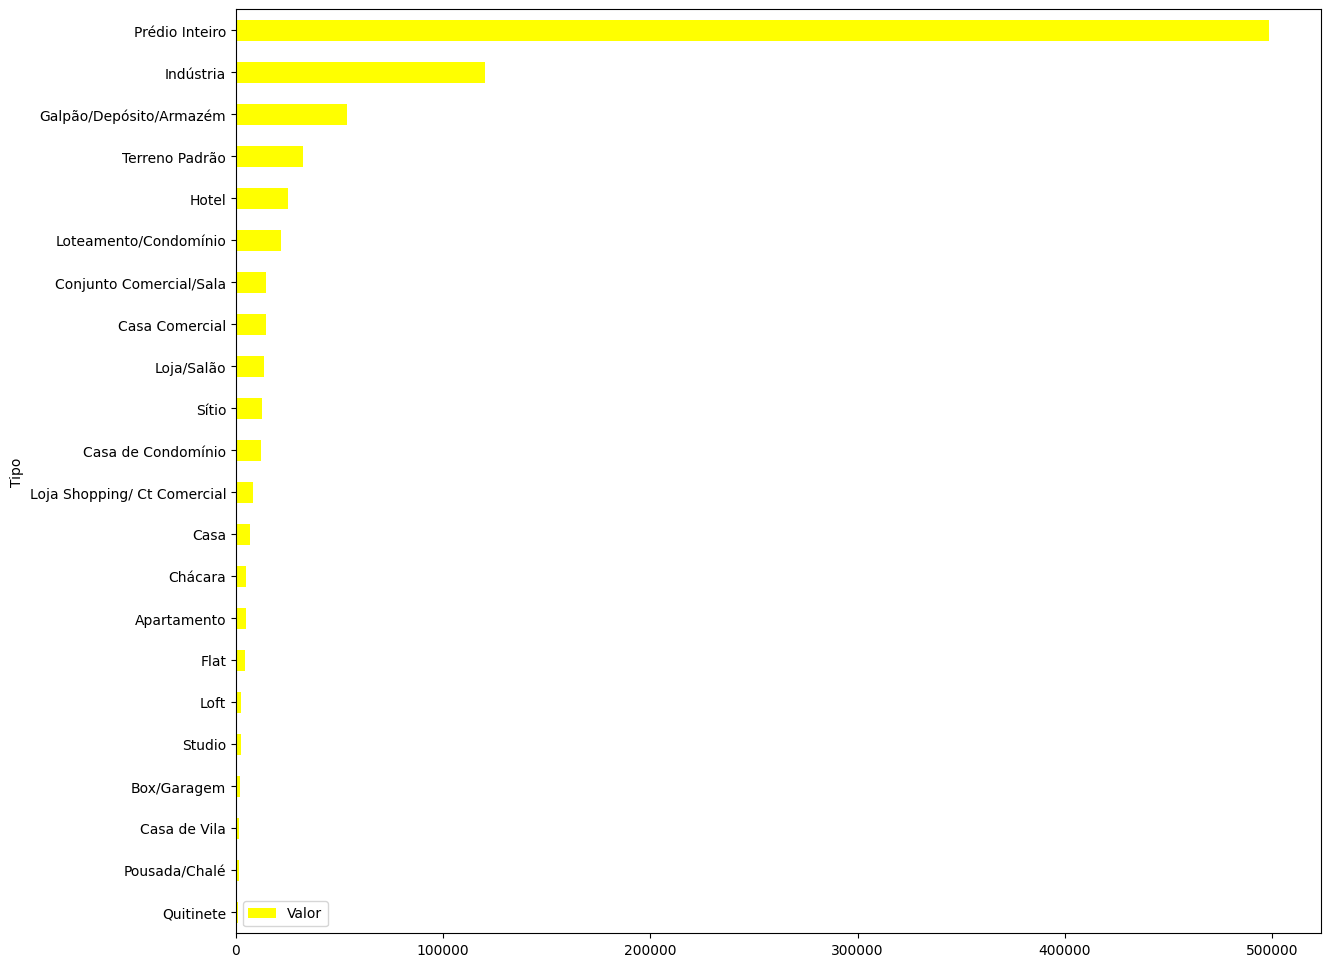

In [95]:
df_group_by_tipos.plot(kind="barh", figsize=(14, 12), color="yellow" )

## Removendo os imóveis comerciais

<Axes: ylabel='Tipo'>

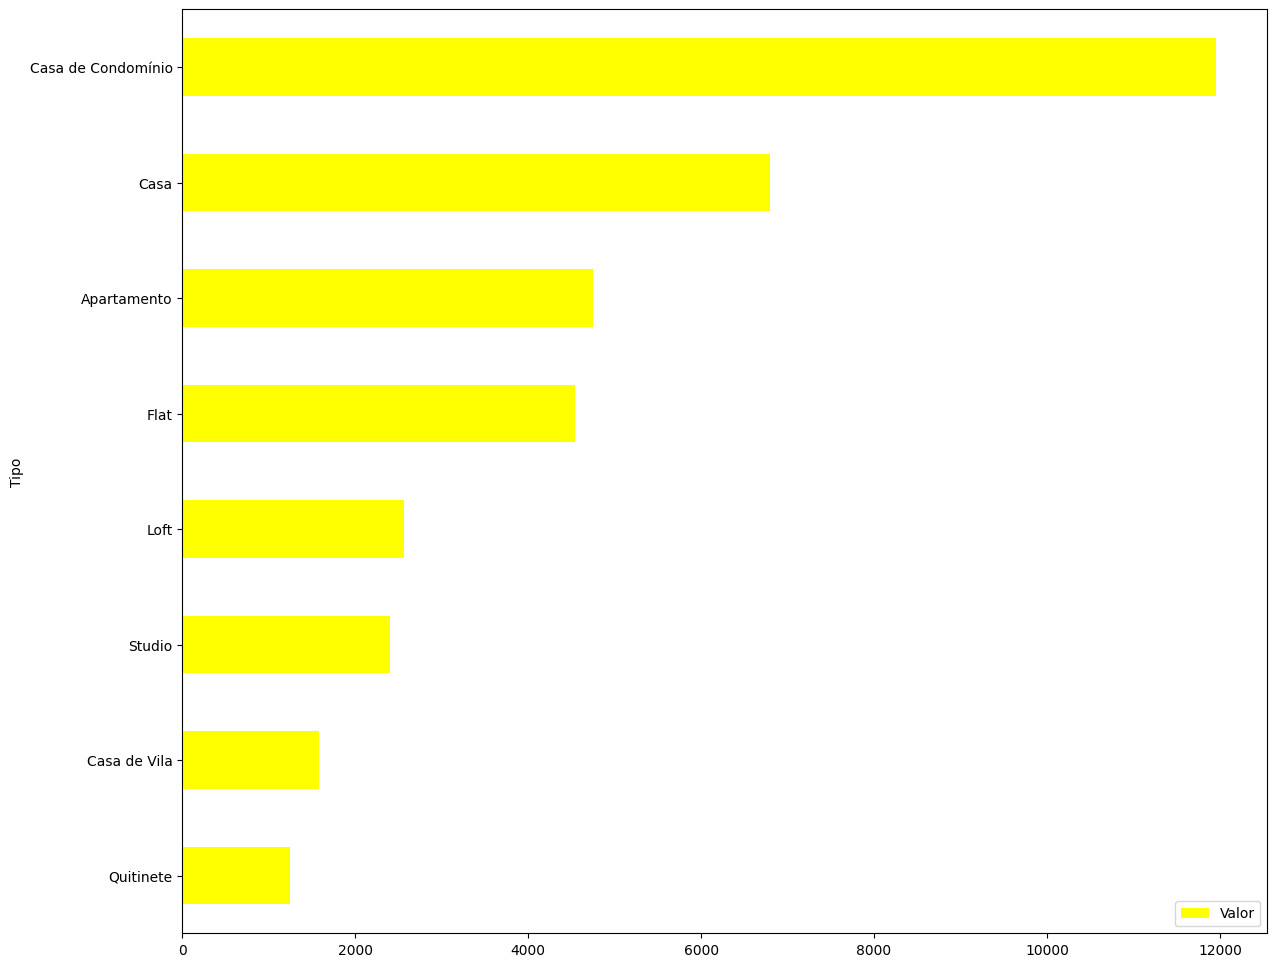

In [96]:
imoveis_comerciais = ["Conjunto Comercial/Sala",
                      "Prédio Inteiro", "Loja/Salão",
                      "Galpão/Depósito/Armazém",
                      "Terreno Padrão", "Casa Comercial",
                      "Loja Shopping/ Ct Comercial",
                      "Chácara", "Box/Garagem",
                      "Loteamento/Condomínio",
                      "Sítio", "Pousada/Chalé",
                      "Hotel", "Indústria" ]

df_imob_not_comercial_graf = df_group_by_tipos.query("@imoveis_comerciais not in Tipo")
df_imob_not_comercial_graf.plot(kind="barh", figsize=(14, 12), color="yellow")

In [97]:
imoveis_comerciais = ["Conjunto Comercial/Sala",
                      "Prédio Inteiro", "Loja/Salão",
                      "Galpão/Depósito/Armazém",
                      "Terreno Padrão", "Casa Comercial",
                      "Loja Shopping/ Ct Comercial",
                      "Chácara", "Box/Garagem",
                      "Loteamento/Condomínio",
                      "Sítio", "Pousada/Chalé",
                      "Hotel", "Indústria" ]

df_imob_not_comercial = imob_data.query("@imoveis_comerciais not in Tipo")
df_imob_not_comercial

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


## Qual o percentual de cada tipo de imóvel na nossa base de dados?

In [98]:
df_imob_not_comercial.Tipo.unique()

array(['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Flat',
       'Casa de Vila', 'Loft', 'Studio'], dtype=object)

In [99]:
imob_count = df_imob_not_comercial['Tipo'].value_counts().round(2)
imob_percent = (df_imob_not_comercial.Tipo.value_counts(normalize=True)*100).round(2)

In [100]:
imob_count
imob_percentual_total = imob_percent.to_frame().sort_values("Tipo")

<Axes: xlabel='Tipo', ylabel='Percentual(%)'>

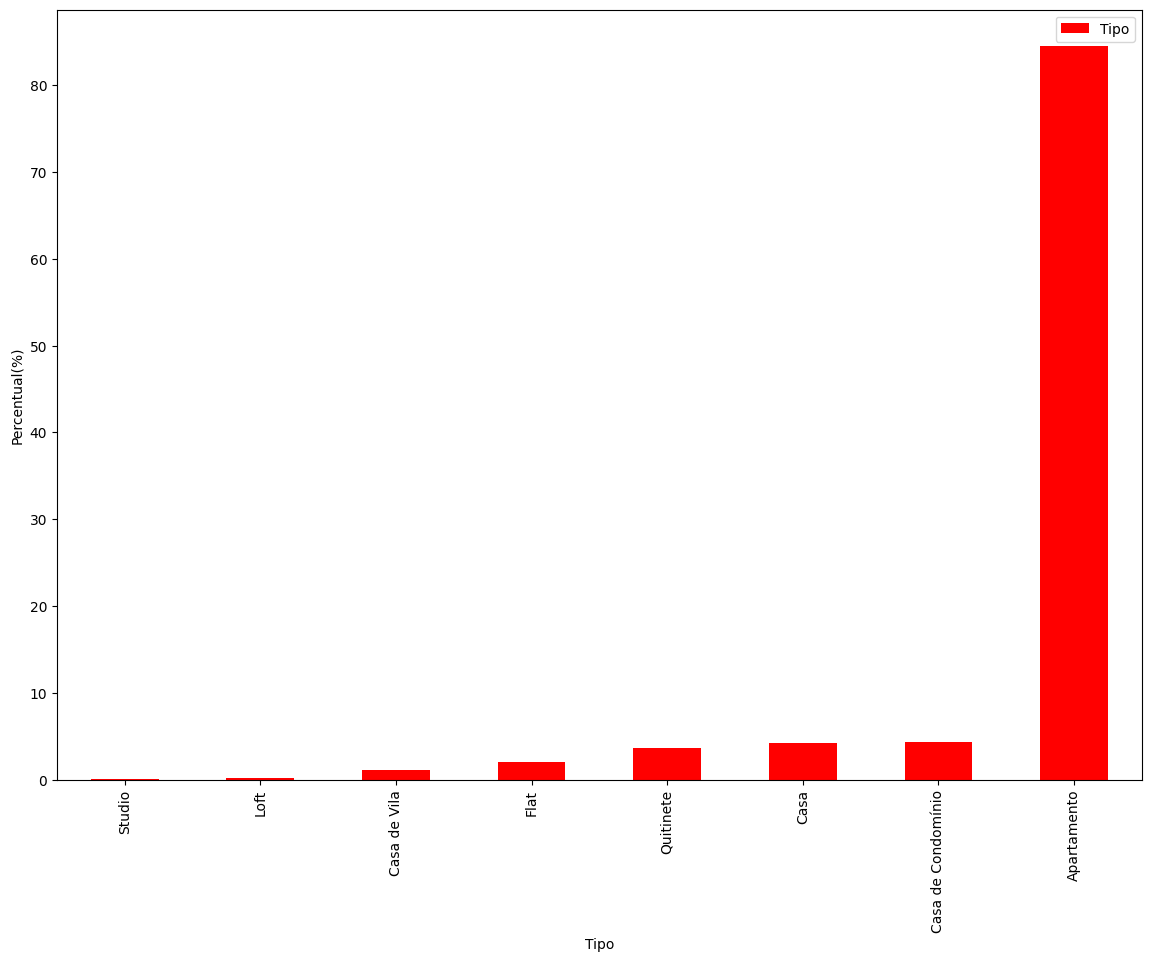

In [101]:
imob_percentual_total.plot(kind="bar", color="red", xlabel="Tipo", ylabel="Percentual(%)", figsize=(14, 10), legend="Grafico de porcentage dos valores")

In [102]:
df_imob_not_comercial.query("Tipo == 'Apartamento'")

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32951,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,NaN
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


### **Selecionando apenas os imóveis do tipo apartamento**

# Tratando e filtrando os dados

## Lidando com dados nulos

In [103]:
df_imob_not_comercial.isnull().sum()

Tipo             0
Bairro           0
Quartos          0
Vagas            0
Suites           0
Area             0
Valor            9
Condominio    1865
IPTU          6879
dtype: int64

In [104]:
df_imob_not_comercial.fillna(0, inplace=True)
df_imob_not_comercial.isnull().sum()

<ipython-input-104-9e8b94ec606f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imob_not_comercial.fillna(0, inplace=True)


Tipo          0
Bairro        0
Quartos       0
Vagas         0
Suites        0
Area          0
Valor         0
Condominio    0
IPTU          0
dtype: int64

## Removendo registros

In [112]:
df_imob_not_comercial.query("Valor == 0 | Condominio == 0").tail()

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU


In [106]:
registros_remover = df_imob_not_comercial.query("Valor == 0 | Condominio == 0").index

In [107]:
df_imob_not_comercial.drop(registros_remover, axis=0, inplace=True)

<ipython-input-107-00dc8d124673>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imob_not_comercial.drop(registros_remover, axis=0, inplace=True)


In [108]:
df_imob_not_comercial.query("Valor==0|Condominio==0")

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU


In [109]:
df_imob_not_comercial.drop('Tipo', axis=1, inplace=True)

<ipython-input-109-b6aa132c98af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imob_not_comercial.drop('Tipo', axis=1, inplace=True)


In [110]:
print_tabulated(df_imob_not_comercial, True)

┏━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━┓
┃    ┃ Bairro       ┃   Quartos ┃   Vagas ┃   Suites ┃   Area ┃   Valor ┃   Condominio ┃   IPTU ┃
┣━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━┫
┃  0 ┃ Copacabana   ┃         1 ┃       0 ┃        0 ┃     40 ┃    1700 ┃          500 ┃     60 ┃
┣━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━┫
┃  3 ┃ Centro       ┃         1 ┃       0 ┃        0 ┃     15 ┃     800 ┃          390 ┃     20 ┃
┣━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━┫
┃  4 ┃ Higienópolis ┃         1 ┃       0 ┃        0 ┃     48 ┃     800 ┃          230 ┃      0 ┃
┣━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━┫
┃  6 ┃ Cachambi     ┃         2 ┃       0 ┃        0 ┃     50 ┃    1300 ┃          301 ┃     17 ┃
┣━━━━╋━━━━━━━━━━━━━━

In [113]:
import pandas as pd

dados = pd.DataFrame([['Feira', 'Cebola', 2.5],
                        ['Mercado', 'Cebola', 1.99],
                        ['Supermercado', 'Cebola', 1.69],
                        ['Feira', 'Tomate', 4],
                        ['Mercado', 'Tomate', 3.29],
                        ['Supermercado', 'Tomate', 2.99],
                        ['Feira', 'Batata', 4.2],
                        ['Mercado', 'Batata', 3.99],
                        ['Supermercado', 'Batata', 3.69]],
                        columns = ['Local', 'Produto', 'Preço'])
dados

,Local,Produto,Preço
0,Feira,Cebola,2.50
1,Mercado,Cebola,1.99
2,Supermercado,Cebola,1.69
3,Feira,Tomate,4.00
4,Mercado,Tomate,3.29
5,Supermercado,Tomate,2.99
6,Feira,Batata,4.20
7,Mercado,Batata,3.99
8,Supermercado,Batata,3.69


In [116]:
drop_query_mercado = dados.query("Local=='Supermercado'").index

dados.drop(drop_query_mercado, axis=0, inplace=True)
print_tabulated(dados, False)

┏━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┓
┃    ┃ Local   ┃ Produto   ┃   Preço ┃
┣━━━━╋━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━┫
┃  0 ┃ Feira   ┃ Cebola    ┃    2.5  ┃
┣━━━━╋━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━┫
┃  1 ┃ Mercado ┃ Cebola    ┃    1.99 ┃
┣━━━━╋━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━┫
┃  3 ┃ Feira   ┃ Tomate    ┃    4    ┃
┣━━━━╋━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━┫
┃  4 ┃ Mercado ┃ Tomate    ┃    3.29 ┃
┣━━━━╋━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━┫
┃  6 ┃ Feira   ┃ Batata    ┃    4.2  ┃
┣━━━━╋━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━┫
┃  7 ┃ Mercado ┃ Batata    ┃    3.99 ┃
┗━━━━┻━━━━━━━━━┻━━━━━━━━━━━┻━━━━━━━━━┛


## Filtros

### **1. Apartamentos que possuem `1 quarto` e `aluguel menor que 1200`**



In [144]:
#query_filtro_1 = df_imob_not_comercial.query("Valor < 1200 | Quartos = 1").index
selecao = (df_imob_not_comercial["Quartos"] == 1) & (df_imob_not_comercial["Valor"] < 1200 )
print_tabulated(df_imob_not_comercial[selecao], True)

┏━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━┓
┃    ┃ Bairro       ┃   Quartos ┃   Vagas ┃   Suites ┃   Area ┃   Valor ┃   Condominio ┃   IPTU ┃
┣━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━┫
┃  3 ┃ Centro       ┃         1 ┃       0 ┃        0 ┃     15 ┃     800 ┃          390 ┃     20 ┃
┣━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━┫
┃  4 ┃ Higienópolis ┃         1 ┃       0 ┃        0 ┃     48 ┃     800 ┃          230 ┃      0 ┃
┣━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━┫
┃ 28 ┃ Tijuca       ┃         1 ┃       0 ┃        0 ┃     48 ┃     750 ┃          772 ┃     25 ┃
┣━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━┫
┃ 54 ┃ Centro       ┃         1 ┃       0 ┃        0 ┃     27 ┃     750 ┃          371 ┃     19 ┃
┣━━━━╋━━━━━━━━━━━━━━

In [145]:
df_selected_01 = df_imob_not_comercial[selecao]

### **2. `Apartamentos` que possuem pelo menos `2 quartos`, `aluguel menor que 3000` e `area maior que 70`**

In [149]:
selecao_002 = ((df_imob_not_comercial["Quartos"] >=  2) & (df_imob_not_comercial["Valor"] < 3000) & (df_imob_not_comercial["Area"] > 70))
df_selected_02 = df_imob_not_comercial[selecao_002]
print_tabulated(df_selected_02, True)

┏━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━┓
┃    ┃ Bairro                   ┃   Quartos ┃   Vagas ┃   Suites ┃   Area ┃   Valor ┃   Condominio ┃   IPTU ┃
┣━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━┫
┃ 12 ┃ Lins de Vasconcelos      ┃         3 ┃       1 ┃        1 ┃     90 ┃    1500 ┃          455 ┃     14 ┃
┣━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━┫
┃ 21 ┃ Tijuca                   ┃         2 ┃       1 ┃        0 ┃    110 ┃    1900 ┃          700 ┃    138 ┃
┣━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━┫
┃ 24 ┃ Tijuca                   ┃         2 ┃       1 ┃        0 ┃     78 ┃    2000 ┃          700 ┃      0 ┃
┣━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━┫
┃ 32 ┃ Bot

>Exercicios:

1) Verifique se a base de dados possui dados nulos e, caso tenha, realize o tratamento desses dados nulos da forma que achar mais coerente com a situação.

2) Os alunos "Alice" e "Carlos", não fazem mais parte da turma. Sendo assim, remova-os da base de dados.

3) Aplique um filtro que selecione apenas os alunos que foram aprovados.

4) Salve o DataFrame que possui apenas os alunos aprovados em um arquivo csv chamado "alunos_aprovados.csv".

In [168]:
url_alunos = "https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv"
alunos = pd.read_csv(url_alunos, sep=",")
print_tabulated(alunos, False)

┏━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┓
┃    ┃ Nome      ┃   Idade ┃   Notas ┃ Aprovado   ┃
┣━━━━╋━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━┫
┃  0 ┃ Ary       ┃      20 ┃     7.5 ┃ True       ┃
┣━━━━╋━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━┫
┃  1 ┃ Ana       ┃      18 ┃   nan   ┃ False      ┃
┣━━━━╋━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━┫
┃  2 ┃ Cátia     ┃      27 ┃     2.5 ┃ False      ┃
┣━━━━╋━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━┫
┃  3 ┃ Denis     ┃      18 ┃     5   ┃ False      ┃
┣━━━━╋━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━┫
┃  4 ┃ Beto      ┃      21 ┃    10   ┃ True       ┃
┣━━━━╋━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━┫
┃  5 ┃ Bruna     ┃      23 ┃   nan   ┃ False      ┃
┣━━━━╋━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━┫
┃  6 ┃ Dara      ┃      21 ┃     7   ┃ True       ┃
┣━━━━╋━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━┫
┃  7 ┃ Carlos    ┃      19 ┃     6   ┃ True       ┃
┣━━━━╋━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━┫
┃  8 ┃ Alice

In [169]:
alunos.isnull().sum()
alunos["Notas"].fillna(method="ffill", inplace=True)
print_tabulated(alunos, False)
print(alunos.isnull().sum())

┏━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┓
┃    ┃ Nome      ┃   Idade ┃   Notas ┃ Aprovado   ┃
┣━━━━╋━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━┫
┃  0 ┃ Ary       ┃      20 ┃     7.5 ┃ True       ┃
┣━━━━╋━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━┫
┃  1 ┃ Ana       ┃      18 ┃     7.5 ┃ False      ┃
┣━━━━╋━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━┫
┃  2 ┃ Cátia     ┃      27 ┃     2.5 ┃ False      ┃
┣━━━━╋━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━┫
┃  3 ┃ Denis     ┃      18 ┃     5   ┃ False      ┃
┣━━━━╋━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━┫
┃  4 ┃ Beto      ┃      21 ┃    10   ┃ True       ┃
┣━━━━╋━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━┫
┃  5 ┃ Bruna     ┃      23 ┃    10   ┃ False      ┃
┣━━━━╋━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━┫
┃  6 ┃ Dara      ┃      21 ┃     7   ┃ True       ┃
┣━━━━╋━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━┫
┃  7 ┃ Carlos    ┃      19 ┃     6   ┃ True       ┃
┣━━━━╋━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━┫
┃  8 ┃ Alice

In [173]:
selecao_alunos = alunos.query("Nome == 'Carlos' | Nome == 'Alice'").index
alunos.drop(selecao_alunos, axis=0, inplace=True)
print_tabulated(alunos, False)
selecao_alunos

┏━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┓
┃    ┃ Nome      ┃   Idade ┃   Notas ┃ Aprovado   ┃
┣━━━━╋━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━┫
┃  0 ┃ Ary       ┃      20 ┃     7.5 ┃ True       ┃
┣━━━━╋━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━┫
┃  1 ┃ Ana       ┃      18 ┃     7.5 ┃ False      ┃
┣━━━━╋━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━┫
┃  2 ┃ Cátia     ┃      27 ┃     2.5 ┃ False      ┃
┣━━━━╋━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━┫
┃  3 ┃ Denis     ┃      18 ┃     5   ┃ False      ┃
┣━━━━╋━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━┫
┃  4 ┃ Beto      ┃      21 ┃    10   ┃ True       ┃
┣━━━━╋━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━┫
┃  5 ┃ Bruna     ┃      23 ┃    10   ┃ False      ┃
┣━━━━╋━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━┫
┃  6 ┃ Dara      ┃      21 ┃     7   ┃ True       ┃
┣━━━━╋━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━┫
┃  9 ┃ Vitor     ┃      28 ┃     5.6 ┃ False      ┃
┣━━━━╋━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 10 ┃ Danie

Int64Index([7, 8], dtype='int64')

In [174]:
aprovados = alunos.Aprovado == True
alunos_aprovados = alunos[aprovados]
print_tabulated(alunos_aprovados, False)

┏━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┓
┃    ┃ Nome      ┃   Idade ┃   Notas ┃ Aprovado   ┃
┣━━━━╋━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━┫
┃  0 ┃ Ary       ┃      20 ┃     7.5 ┃ True       ┃
┣━━━━╋━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━┫
┃  4 ┃ Beto      ┃      21 ┃    10   ┃ True       ┃
┣━━━━╋━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━┫
┃  6 ┃ Dara      ┃      21 ┃     7   ┃ True       ┃
┣━━━━╋━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 12 ┃ Sthefanie ┃      26 ┃     9.5 ┃ True       ┃
┣━━━━╋━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 13 ┃ Mirla     ┃      25 ┃     9   ┃ True       ┃
┣━━━━╋━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 15 ┃ Mylena    ┃      29 ┃     7   ┃ True       ┃
┣━━━━╋━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 17 ┃ Nadia     ┃      34 ┃     8   ┃ True       ┃
┗━━━━┻━━━━━━━━━━━┻━━━━━━━━━┻━━━━━━━━━┻━━━━━━━━━━━━┛


In [176]:
alunos_aprovados.to_csv("alunos_aprovados.csv", index=False, sep=",")

In [178]:
print_tabulated(pd.read_csv("alunos_aprovados.csv"), False)

┏━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┓
┃    ┃ Nome      ┃   Idade ┃   Notas ┃ Aprovado   ┃
┣━━━━╋━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━┫
┃  0 ┃ Ary       ┃      20 ┃     7.5 ┃ True       ┃
┣━━━━╋━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━┫
┃  1 ┃ Beto      ┃      21 ┃    10   ┃ True       ┃
┣━━━━╋━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━┫
┃  2 ┃ Dara      ┃      21 ┃     7   ┃ True       ┃
┣━━━━╋━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━┫
┃  3 ┃ Sthefanie ┃      26 ┃     9.5 ┃ True       ┃
┣━━━━╋━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━┫
┃  4 ┃ Mirla     ┃      25 ┃     9   ┃ True       ┃
┣━━━━╋━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━┫
┃  5 ┃ Mylena    ┃      29 ┃     7   ┃ True       ┃
┣━━━━╋━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━┫
┃  6 ┃ Nadia     ┃      34 ┃     8   ┃ True       ┃
┗━━━━┻━━━━━━━━━━━┻━━━━━━━━━┻━━━━━━━━━┻━━━━━━━━━━━━┛


## Salvando os dados

# Manipulando os dados

## Criando colunas numéricas

## Criando colunas categóricas